# Challenge Evaluate Sentiment Classifier
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

    1. Do any of your classifiers seem to overfit?
    2. Which seem to perform the best? Why?
    3. Which features seemed to be most impactful to performance?
    
## Import and Create Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

%matplotlib inline

In [2]:
# Import the data delimiter based on tabs
df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)

# Rename columns note Type 1 = Positive Type 2 = Negative
df.columns = ['Review', 'Type']
df.head()

,Review,Type
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## Word Cloud
For the original classifer used a word cloud to identify the most common words.

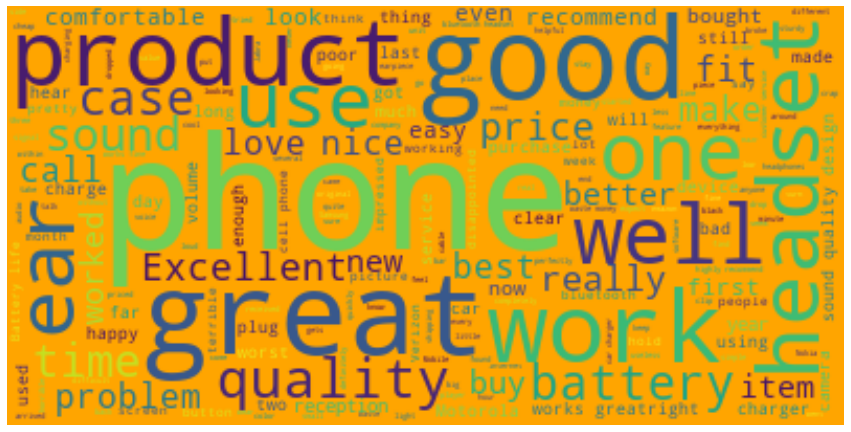

In [3]:
# Create a Word Cloud image
wordcloud = WordCloud(background_color='orange').generate(
    ''.join(df['Review']))

plt.figure(figsize=(15, 10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [4]:
# create filter for positive words
keywords = ['good', 'great', 'happy', 'love', 'best',
            'excellent', 'comfortable', 'highly recommend', 
            'must have', 'very impressed']

#create new boolean columns based on those words
for key in keywords:
        df[str(key)] = df['Review'].str.contains(
            str(key), case=False)

In [5]:
# Create and data and target group
data = df[keywords]
target = df['Type']

bnb = BernoulliNB()
bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 283


## Original Model Performance
Looking at the testing with the holdout group and with the cross validation, the classifier is overfit as the accuracy scores fluctuate drastically in the various tests. Looking at the confusion matrix, the model correctly identified 93% of negative reviews. The model only correctly identified 50% of positive reviews. Lets try to increase the accuracy of the positive identification. 

In [6]:
# Test model with different holdout groups.
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(data, target).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(X_train, y_train)))

With 10% Holdout: 0.76
Testing on Sample: 0.7122222222222222


In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.78, 0.7 , 0.82, 0.72, 0.71, 0.72, 0.64, 0.69, 0.73, 0.66])

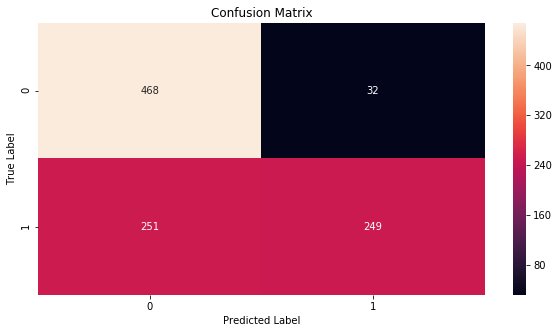

In [8]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

In [9]:
# calculate the specificity and sensitivity
specificity = 468 / 500
sensitivity = 249 / 500

print('The precentage of correctly identified', 
      'positives is {}.'.format(sensitivity*100))

print('The precentage of correctly identified', 
      'negatives is {}.'.format(specificity*100))

The precentage of correctly identified positives is 49.8.
The precentage of correctly identified negatives is 93.60000000000001.


## Listing of Top Words
One of the issues of the original classifier is the judgement used to select the positive words. A list will be generated of the top 10 positive and top 10 negative words. These words will be used in the new iteration. 

In [10]:
from collections import Counter

# Creating new dataframes for positive and negative feedback.
positive_raw = df[df['Type'] == 1]
negative_raw = df[df['Type'] == 0]

# Creating a list of the individual words in the strings.
positive_words = []
negative_words = []
for x in positive_raw['Review']:
    split = x.split()
    positive_words = positive_words + split

for x in negative_raw['Review']:
    split = x.split()
    negative_words = negative_words + split

# Using set's to determine common words in each of the lists.
intersect = list(set(positive_words) & set(negative_words))

for x in intersect:
    while x in positive_words:
        positive_words.remove(x)
    while x in negative_words:
        negative_words.remove(x)
        
# Converting the words to lowercase
positive_words = [x.lower() for x in positive_words]
negative_words = [x.lower() for x in negative_words]

# Getting a count of the words in each list, and printing the top 25 most common in each.
negative_counts = Counter(negative_words)
positive_counts = Counter(positive_words)    
print('Most common negative words:', negative_counts.most_common(10))
print('Most common positive words:', positive_counts.most_common(10))

Most common negative words: [('waste', 13), ('worst', 13), ('bad', 11), ("don't", 11), ('not', 9), ('poor', 9), ('do', 8), ('what', 7), ('money', 7), ("didn't", 7)]
Most common positive words: [('works', 43), ('great', 30), ('love', 20), ('best', 19), ('nice', 19), ('good', 13), ('working', 9), ('pretty', 8), ('excellent', 8), ('fine', 6)]


## Iteration 1
In interation 1, the model was used for just negative words instead of just positive words. This is almost a mirror of the only positive reviews. Almost all the positive reviews are correctly identified but negative reviews were more likely to be misclassified.  

In [11]:
# create list of negative words
it1_words = ["wate", "worst", "bad", "don't", "not",
            "poor", "do", "what", "money", "didn't"]

#create new boolean columns based on those words
for key in it1_words:
        df[str(key)] = df['Review'].str.contains(
            str(key), case=False)

In [12]:
# Create and data and target group
data = df[it1_words]

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 324


In [13]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(data, target).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(X_train, y_train)))

With 10% Holdout: 0.71
Testing on Sample: 0.6722222222222223


In [14]:
# print cross validation array
cross_val_score(bnb, data, target, cv=10)

array([0.71, 0.71, 0.71, 0.66, 0.67, 0.65, 0.66, 0.6 , 0.73, 0.66])

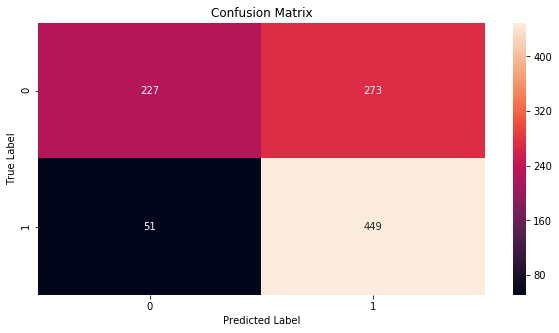

In [15]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

## Iteration 2
In iteration 2, additional positive words were used to help classify positive reviews. There was a slight increase in positive reviews but no additional negative reviews were properly classified. 

In [16]:
it2_words = ['works', 'great', 'love', 'best', 'nice',
            'good', 'working', 'pretty', 'excellent', 'fine']

#create new boolean columns based on those words
for key in it2_words:
        df[str(key)] = df['Review'].str.contains(
            str(key), case=False)

In [17]:
# Create and data and target group
data = df[it2_words]

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 267


In [18]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(data, target).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(X_train, y_train)))

With 10% Holdout: 0.73
Testing on Sample: 0.7333333333333333


In [19]:
# print cross validation array
cross_val_score(bnb, data, target, cv=10)

array([0.79, 0.77, 0.8 , 0.77, 0.72, 0.69, 0.68, 0.69, 0.76, 0.66])

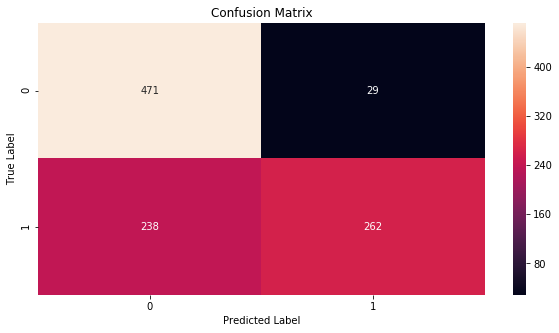

In [20]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

## Iteration 3
In iteration 3, the larger positive list and larger negative list from iteration 1 and 2 were combined. This is the most accurate model so far for negative classification. For possitive classification it remains about the same.

In [21]:
it1_words.extend(it2_words)

# Create and data and target group
data = df[it1_words]

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 259


In [22]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(data, target).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(X_train, y_train)))

With 10% Holdout: 0.72
Testing on Sample: 0.7433333333333333


In [23]:
# print cross validation array
cross_val_score(bnb, data, target, cv=10)

array([0.79, 0.78, 0.8 , 0.78, 0.73, 0.69, 0.67, 0.71, 0.78, 0.66])

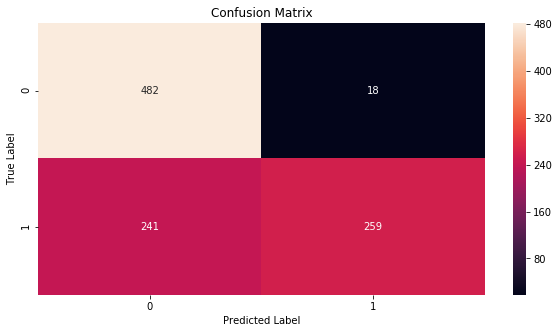

In [24]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

## Iteration 4
For iteration 4, the larger positive list and larger negative list from iteration 2 and 3 were combined. This is the most accurate model so far for negative classification. FOr possitive classification it remains about the same.

In [25]:
# make two lists positive and negative 
pos_len = []
neg_len = []

# For each review classify positive and negative and append
# length of review to corresponding list
for i, review in enumerate(df['Type']):
    if review == 1:
        pos_len.append(len(df.loc[i , 'Review']))
    else:
        neg_len.append(len(df.loc[i , 'Review']))

# print the results
print('Average length of positive review is '+
      '{}'.format(sum(pos_len)/len(pos_len)))

print('Average length of negative review is '+
      '{}'.format(sum(neg_len)/len(neg_len)))

Average length of positive review is 53.628
Average length of negative review is 56.824


In [26]:
length = []

# create new variable based on length of review
for review in df['Review']:
    if len(review) >= 40:
        length.append(False)
    else:
        length.append(True)
        
df['Length'] = length
it4_words = ['Length']


In [27]:
# Create and data and target group
data = df[it4_words]

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 468


In [28]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(data, target).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(X_train, y_train)))

With 10% Holdout: 0.54
Testing on Sample: 0.5311111111111111


In [29]:
# print cross validation array
cross_val_score(bnb, data, target, cv=10)

array([0.58, 0.49, 0.5 , 0.53, 0.59, 0.54, 0.53, 0.53, 0.53, 0.5 ])

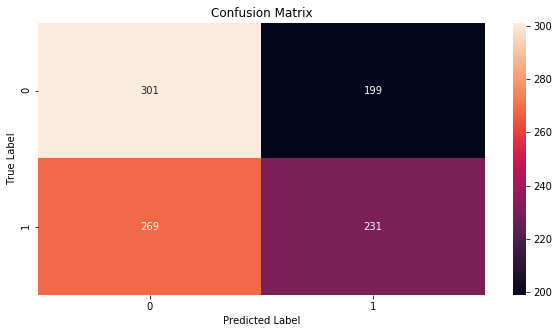

In [30]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

## Iteration 5
For iteration 5 a new variable was used to classify the positive and negative reviews: review length. Reviewers were most likely to leave a shorter review for positive feedback than negative feedback. The length of the reviews were added to the classifier in addition to the positive and negative word list. This iteration has the best split in identification than all the other iterations. 

In [31]:
it5_words = it1_words + it4_words
data= df[it5_words]

bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 270


In [32]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(data, target).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(X_train, y_train)))

With 10% Holdout: 0.76
Testing on Sample: 0.7266666666666667


In [33]:
# print cross validation array
cross_val_score(bnb, data, target, cv=10)

array([0.81, 0.78, 0.74, 0.75, 0.73, 0.68, 0.69, 0.7 , 0.79, 0.61])

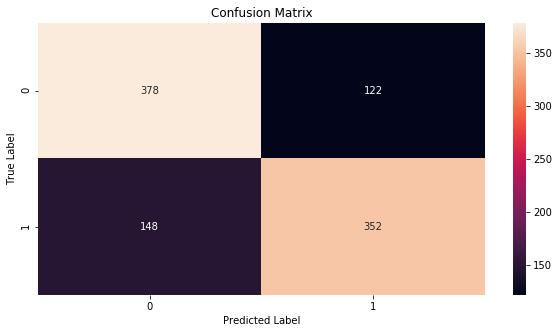

In [34]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

# Discussion and Conclusion
## 1. Overfitting Classifiers
In almost all of the iterations and original classifer was overfitted. Interestingly enough, the least accurate iteration is also the least overfit: iteration 4. When looking at the cross validation for the rest of the iterations, the accuracy of the classifer swung drastically from 60 - 80 %.

## 2. Best Performance
Iteration 3 is the most accurate iteration with only 259 misclassified. Unfortunately, it is skewed towards correctly identifying negative reviews and an even split on the positive ones. One wouldn't classify this iteration as the best performance. 

Out of all the iterations the best one was iteration 5. That iteration combined the positive and negative word list as well as the length categorization. It was one of the most accurate iteration, and it correctly identified about the same amount for both positive and negative reviews ie. 360. Unfortunately it is still overfitted as the data drastically swings in accuracy in the cross validation.

## 3. Impactful Features
The most impactful features were the combination of both positive and negative words. The addition of review length help remove the identification bias towards one side. 